## import libraries

In [1]:
import torch
import gym
import matplotlib.pyplot as plt

##### Define cartpole environment

In [2]:
env = gym.make('CartPole-v0')

##### obtain dimensions of the observation and action space

In [3]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n

##### run each episode with specific weight

In [4]:
def run_episode(env, weight):
  state = env.reset()
  total_reward = 0
  is_done = False
  while not is_done:
    state = torch.from_numpy(state).float()
    action = torch.argmax(torch.matmul(state, weight))
    state, reward, is_done, _ = env.step(action.item())
    total_reward += reward
  return total_reward

In [5]:
n_episode = 1000
best_total_reward = 0
best_weight = None
total_rewards = []

##### run random search for find weight with max reward

In [6]:
for episode in range(n_episode):
  weight = torch.rand(n_state, n_action)
  total_reward = run_episode(env, weight)
  print('Episode {}: {}'.format(episode+1, total_reward))
  if total_reward > best_total_reward:
    best_weight = weight
    best_total_reward = total_reward
  total_rewards.append(total_reward)

Episode 1: 136.0
Episode 2: 9.0
Episode 3: 9.0
Episode 4: 10.0
Episode 5: 10.0
Episode 6: 10.0
Episode 7: 200.0
Episode 8: 10.0
Episode 9: 8.0
Episode 10: 60.0
Episode 11: 27.0
Episode 12: 10.0
Episode 13: 36.0
Episode 14: 9.0
Episode 15: 10.0
Episode 16: 8.0
Episode 17: 10.0
Episode 18: 9.0
Episode 19: 40.0
Episode 20: 9.0
Episode 21: 62.0
Episode 22: 143.0
Episode 23: 10.0
Episode 24: 38.0
Episode 25: 10.0
Episode 26: 11.0
Episode 27: 10.0
Episode 28: 25.0
Episode 29: 200.0
Episode 30: 10.0
Episode 31: 9.0
Episode 32: 10.0
Episode 33: 8.0
Episode 34: 9.0
Episode 35: 106.0
Episode 36: 128.0
Episode 37: 50.0
Episode 38: 26.0
Episode 39: 78.0
Episode 40: 146.0
Episode 41: 8.0
Episode 42: 113.0
Episode 43: 13.0
Episode 44: 28.0
Episode 45: 68.0
Episode 46: 10.0
Episode 47: 10.0
Episode 48: 9.0
Episode 49: 75.0
Episode 50: 83.0
Episode 51: 99.0
Episode 52: 79.0
Episode 53: 9.0
Episode 54: 106.0
Episode 55: 77.0
Episode 56: 9.0
Episode 57: 110.0
Episode 58: 10.0
Episode 59: 77.0
Episode 60

In [7]:
print("average reward in random search", sum(total_rewards)/n_episode)

average reward in random search 47.397


##### now, evalute best weight which obtained in random search.

In [8]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
  total_reward = run_episode(env, best_weight)
  print('Episode {}: {}'.format(episode+1, total_reward))
  total_rewards_eval.append(total_reward)

Episode 1: 188.0
Episode 2: 200.0
Episode 3: 200.0
Episode 4: 200.0
Episode 5: 186.0
Episode 6: 200.0
Episode 7: 200.0
Episode 8: 200.0
Episode 9: 200.0
Episode 10: 164.0
Episode 11: 200.0
Episode 12: 157.0
Episode 13: 200.0
Episode 14: 200.0
Episode 15: 200.0
Episode 16: 174.0
Episode 17: 180.0
Episode 18: 200.0
Episode 19: 158.0
Episode 20: 177.0
Episode 21: 200.0
Episode 22: 192.0
Episode 23: 174.0
Episode 24: 200.0
Episode 25: 200.0
Episode 26: 160.0
Episode 27: 172.0
Episode 28: 200.0
Episode 29: 200.0
Episode 30: 200.0
Episode 31: 200.0
Episode 32: 170.0
Episode 33: 200.0
Episode 34: 200.0
Episode 35: 200.0
Episode 36: 200.0
Episode 37: 173.0
Episode 38: 196.0
Episode 39: 200.0
Episode 40: 200.0
Episode 41: 200.0
Episode 42: 174.0
Episode 43: 200.0
Episode 44: 200.0
Episode 45: 200.0
Episode 46: 200.0
Episode 47: 200.0
Episode 48: 188.0
Episode 49: 200.0
Episode 50: 183.0
Episode 51: 200.0
Episode 52: 176.0
Episode 53: 196.0
Episode 54: 200.0
Episode 55: 178.0
Episode 56: 170.0
E

In [9]:
print('Average total reward over {} episode: {}'.format(n_episode_eval, sum(total_rewards_eval) / n_episode_eval))

Average total reward over 100 episode: 192.03


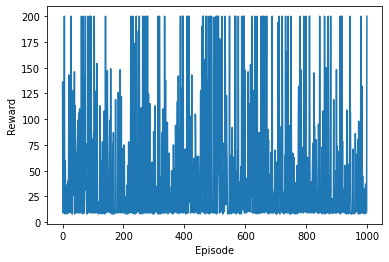

In [10]:
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()